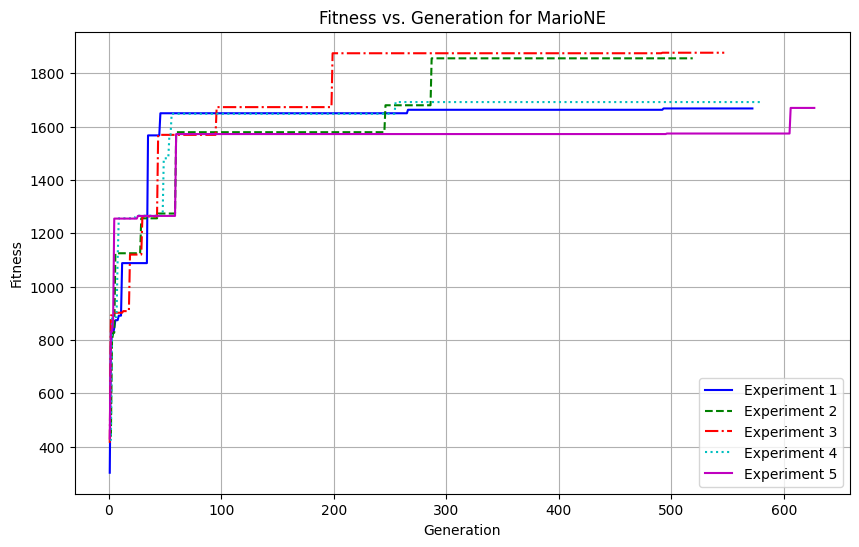

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
directory_path = "."
file_paths = glob.glob(directory_path + "/*.xlsx")
line_styles = ['-', '--', '-.', ':', '-']
colors = ['b', 'g', 'r', 'c', 'm']
data_frames = []
for file_path in file_paths:
    df = pd.read_excel(file_path)
    data_frames.append(df)
plt.figure(figsize=(10, 6))

for i, df in enumerate(data_frames):
    plt.plot(df["Generation"], df["Fitness"], label=f"Experiment {i+1}", linestyle=line_styles[i], color=colors[i])

plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()
plt.title("Fitness vs. Generation for MarioNE")
plt.grid(True)
plt.savefig("Algo2plot1World12.pdf",format='pdf')
plt.show()


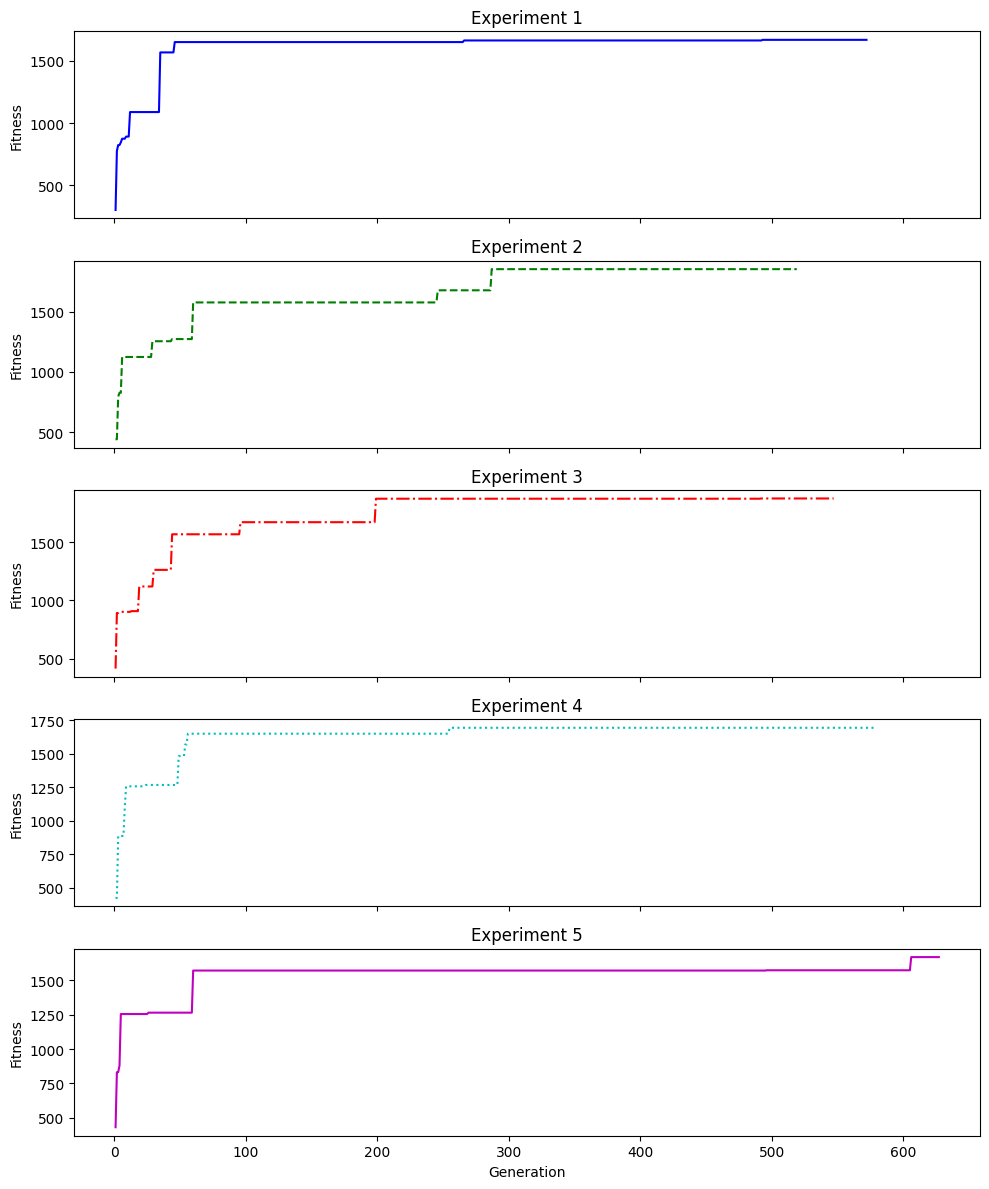

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
directory_path = "."
file_paths = glob.glob(directory_path + "/*.xlsx")
line_styles = ['-', '--', '-.', ':', '-']
colors = ['b', 'g', 'r', 'c', 'm']
fig, axs = plt.subplots(5, 1, figsize=(10, 12), sharex=True)
for i, file_path in enumerate(file_paths):
    df = pd.read_excel(file_path)
    ax = axs[i]
    ax.plot(df["Generation"], df["Fitness"], linestyle=line_styles[i], color=colors[i])
    ax.set_ylabel("Fitness")
    ax.set_title(f"Experiment {i+1}")
axs[-1].set_xlabel("Generation")
plt.tight_layout()
plt.savefig("Algo2plot2World12.pdf",format='pdf')
plt.show()


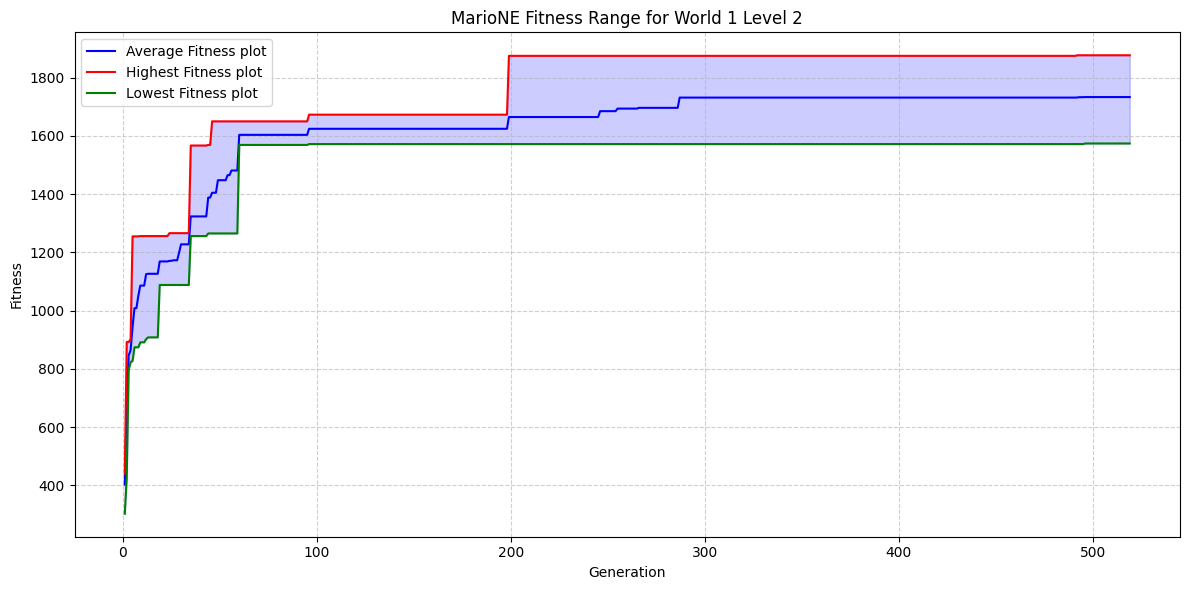

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fitness_algorithm1 = []
max_generations = None
num_experiments = 5
for experiment in range(1, num_experiments + 1):
    excel_file = f'Algorithm2_Experiment{experiment}.xlsx'
    data = pd.read_excel(excel_file)
    data_values = data['Fitness'].values
    fitness_algorithm1.append(data_values)

    if max_generations is None:
        max_generations = len(data_values)
    else:
        max_generations = min(max_generations, len(data_values))
generations = np.arange(1, max_generations + 1)
mean_fitness_algorithm1 = np.empty(max_generations)
min_fitness_algorithm1 = np.empty(max_generations)
max_fitness_algorithm1 = np.empty(max_generations)

for i in range(max_generations):
    available_data = [data[i] for data in fitness_algorithm1 if i < len(data)]
    if available_data:
        mean_fitness_algorithm1[i] = np.mean(available_data)
        min_fitness_algorithm1[i] = np.min(available_data)
        max_fitness_algorithm1[i] = np.max(available_data)
    else:
        mean_fitness_algorithm1[i] = np.nan
        min_fitness_algorithm1[i] = np.nan
        max_fitness_algorithm1[i] = np.nan
plt.figure(figsize=(12, 6))
plt.plot(generations, mean_fitness_algorithm1, label='Average Fitness plot', color='b')
plt.fill_between(generations, min_fitness_algorithm1, max_fitness_algorithm1, color='b', alpha=0.2)
plt.plot(generations, max_fitness_algorithm1, label='Highest Fitness plot', color='red')
plt.plot(generations, min_fitness_algorithm1, label='Lowest Fitness plot', color='green')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('MarioNE Fitness Range for World 1 Level 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='best')
plt.tight_layout()
plt.savefig("Algo2plot3World12.pdf",format='pdf')
plt.show()
